# Object

> Course

In [48]:
class course(object):

    def __init__(self, cid, credit, dept):
        """
        >> course id
        >> the no. of credits
        >> department
        """
        self.cid = cid
        self.credit = credit
        self.dept = dept

    def change_credit(self, new_credit):
        """Change the number of credits"""

        self.credit = new_credit

class GE_course(course):
    def __init__(self, cid, credit, dept, subj_group):
        """In addition to the course parameters, GE_course object has another attributes called subj_group"""

        """Initialize the parent class"""
        super(GE_course, self).__init__(cid, credit, dept)

        self.subj_group = subj_group


In [49]:
course1 = course('CS1102', 3, 'CS')
course2 = course('MA1508', 4, 'Math')
course3 = GE_course('GE2340', 2, 'CS', 'Science&Tech')
course3.change_credit(3)

In [50]:
print(isinstance(course1, course))
print(isinstance(course1, GE_course))
print(isinstance(course3, course))
print(isinstance(course3, GE_course))

True
False
True
True


> student

In [51]:
class student(object):

    def __init__(self, sid, dept):
        """
        >> sid
        >> department
        >> the list of courses taken
        >> dictionary mapping to the course to the courses_grades_dict
        """

        self.sid = sid
        self.dept = dept

        self.courses = []
        self.courses_grades_dict = {}

    def register_course(self, course):
        """
        >> Append course to the list
        >> Add courses in the courses_grades_dict
        """

        self.courses.append(course)
        self.courses_grades_dict[course] = None

    def register_grade(self, course, grade):
        """
        >> Error arises when the course not exist in the dict
        >> update corresponding grades to the course in the dict
        """

        if course not in self.courses_grades_dict:
            print(f"Error: student {self.sid} did not register the course - {course}")

        else:
            self.courses_grades_dict[course] = grade

    def calculate_overall_gpa(self):

        total_credit = 0
        total_credit_grade_product = 0

        for course in self.courses_grades_dict:
            if self.courses_grades_dict[course] == None: #the course is registered but no grade available
                continue

            credit = course.credit
            grade = self.courses_grades_dict[course]
            total_credit = total_credit + credit
            total_credit_grade_product = total_credit_grade_product + credit * grade

        if total_credit == 0:
            print(f"student ({self.sid}) did not complete any course.")

        else:
            gpa = total_credit_grade_product / total_credit
            print(f"The GPA of the student ({self.sid}) is {gpa:.2F}")

    def calculate_GE_gpa(self, subj_group = None):
        """Calculate the GE course GPA within a subject group"""

        total_credit = 0
        total_credit_grade_product = 0

        for course in self.courses_grades_dict:
            
            if self.courses_grades_dict[course] == None:
                continue
            
            if isinstance(course, GE_course) == False:
                continue

            if subj_group is None or course.subj_group == subj_group: # No group specify or within the subject group
                credit = course.credit
                grade = self.courses_grades_dict[course]
                total_credit = total_credit + credit
                total_credit_grade_product = total_credit_grade_product + credit * grade

        if total_credit == 0:
            print(f"student ({self.sid}) did not complete any GE course of the subject group ({subj_group})")

        else:
            gpa = total_credit_grade_product / total_credit
            print(f"The GPA of the GE course of the subject group - ({subj_group}) of the student ({self.sid}) is {gpa:.2F}")


In [52]:
student1 = student('57158416', 'CS')
student1.register_course(course1)
student1.register_course(course2)
student1.register_course(course3)

student1.calculate_overall_gpa()
student1.register_grade(course1, 4)
student1.register_grade(course2, 3.7)
student1.calculate_GE_gpa()
student1.register_grade(course3, 4.3)
student1.calculate_GE_gpa()
student1.calculate_overall_gpa()

student (57158416) did not complete any course.
student (57158416) did not complete any GE course of the subject group (None)
The GPA of the GE course of the subject group - (None) of the student (57158416) is 4.30
The GPA of the student (57158416) is 3.97


### Exercise
Write a class called "department", consisting of students. It has two functions: "num_of_student" returns the number of students and "dept_gpa" returns the average GPA of all students.

# Nearest Neighbours

In [53]:
import numpy as np
import matplotlib.pyplot as plt

class Nearest_Neighbours(object):

    def __init__(self, num_of_points):
        """A matrix generated randomly, each row refers to a point"""

        self.red_points = np.random.rand(num_of_points, 2)
        self.green_points = np.random.rand(num_of_points, 2)

    def classify(self, point):

        """Contruct a np.array"""
        point = np.array(point)

        """Plot the scattered points"""
        plt.scatter(self.red_points[:,0], self.red_points[:,1], c='r', s=3)
        plt.scatter(self.green_points[:,0], self.green_points[:,1], c='g', s=3)

        """Calculate the distance between the point and the archor points (l2 norm)"""
        red_dist = np.linalg.norm(self.red_points - point.reshape(1,2), axis=1)
        green_dist = np.linalg.norm(self.green_points - point.reshape(1,2), axis=1)

        """Calculate the smallest value"""
        min_red_dist = red_dist.min()
        min_green_dist = green_dist.min()

        """
        >> Get the index of all the shortest distance points
        >> plot the point as 'x'
        >> draw a between the point and the shortest distance point
        """

        if min_red_dist < min_green_dist:

            index = np.argmin(red_dist)
            plt.scatter(point[0], point[1], c='r', s=30, marker='x')
            plt.plot([point[0], self.red_points[index, 0]], [point[1], self.red_points[index,1]], c='r', alpha=0.1)

        else:
            index = np.argmin(green_dist)
            plt.scatter(point[0], point[1], c='g', s=30, marker='x')
            plt.plot([point[0], self.green_points[index, 0]], [point[1], self.green_points[index,1]], c='g', alpha=0.1)

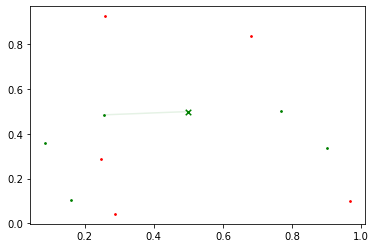

In [54]:
NN_classifier = Nearest_Neighbours(5)
NN_classifier.classify([0.5,0.5])

### Execrise

Extend the nearest neighbour to the K nearest neighbour, with K as a parameter of the classifier.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

class NN_K(object):

    def __init__(self, num_of_points):

        self.red_points = np.random.rand(num_of_points, 2)
        self.green_points = np.random.rand(num_of_points, 2)

    def classify(self, point, K):
        
        """Construct a np.array object"""
        point = np.array(point)

        """plot the random generated points"""
        plt.scatter(self.red_points[:,0], self.red_points[:,1], c='r', s=3)
        plt.scatter(self.green_points[:,0], self.green_points[:,1], c='g', s=3)
        
        """using loop to iterate K nearest points"""
        k_points = []
        count_red = 0
        count_green = 0
        for i in range(K):
            
            """Distance from points to the archor point"""
            red_point_dist = np.linalg.norm(self.red_points - point.reshape(1,2), axis=1)
            green_point_dist = np.linalg.norm(self.green_points - point.reshape(1,2), axis=1)

            """smallest value of each group"""
            min_red_dist = red_point_dist.min()
            min_green_dist = green_point_dist.min()

            
            if min_red_dist < min_green_dist:
                """get the index of the shortest distance point"""
                smallest_val_idx = np.argmin(red_point_dist)
                k_points.append(self.red_points[smallest_val_idx])
                self.red_points = np.delete(self.red_points, smallest_val_idx, axis=0)
                count_red += 1

            else:
                smallest_val_idx = np.argmin(green_point_dist)
                k_points.append(self.green_points[smallest_val_idx])
                self.green_points = np.delete(self.green_points, smallest_val_idx, axis=0)
                count_green +=1

        """Concate k_points list to K_points array"""
        k_points_array = np.vstack(k_points)

        """Plot the line between selected point """
        for select_point in k_points_array:
            if count_red > count_green:
                plt.scatter(point[0], point[1], c='r', s=30, marker='x')
                plt.plot([point[0],select_point[0]], [point[1],select_point[1]], c='r', alpha=0.1)

            else:
                plt.scatter(point[0], point[1], c='g', s=30, marker='x')
                plt.plot([point[0],select_point[0]], [point[1],select_point[1]], c='g', alpha=0.1)

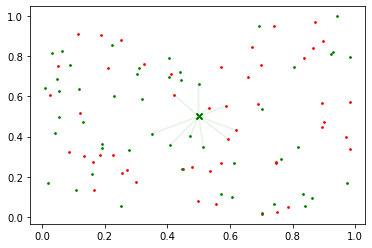

In [56]:
NN_classifierK = NN_K(50)
NN_classifierK.classify([0.5,0.5], 10)